In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
tf.reset_default_graph()

batch_size = 64
X_in = tf.placeholder(tf.float32, shape = [None, 28, 28], name = 'X')
Y = tf.placeholder(tf.float32, shape = [None, 28, 28], name= 'Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])

def encoder(X_in):
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape = [-1 ,28 ,28 ,1])
        hidden1 = tf.layers.conv2d(X, filters = 64, kernel_size = 4, strides=2, padding='same', activation = tf.nn.relu)
        hidden2 = tf.layers.conv2d(hidden1, filters=64, kernel_size = 4, strides=2, padding = 'same', activation=tf.nn.relu)
        flat = tf.contrib.layers.flatten(hidden2)
        mn = tf.layers.dense(flat, 2)
        sd = 0.5 * tf.layers.dense(flat, 2)   
        epsilon = tf.random_normal(tf.stack([tf.shape(flat)[0], 2])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        return z, mn, sd



In [0]:
def decoder(sampled_z):
    with tf.variable_scope("decoder", reuse=None):
        hidden1 = tf.layers.dense(sampled_z, 300, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, 49, activation=tf.nn.relu)
        hidden3 = tf.reshape(hidden2, [-1, 7, 7 ,1])
        hidden4 = tf.layers.conv2d_transpose(hidden3, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        flat1 = tf.contrib.layers.flatten(hidden4)
        flat2= tf.layers.dense(flat1, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(flat2, shape=[-1, 28, 28])
        return img

In [0]:
sampled, mn, sd = encoder(X_in)
img = decoder(sampled)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [0]:
unreshaped = tf.reshape(img, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

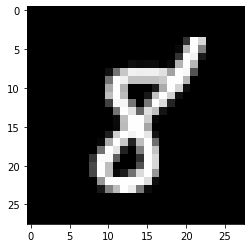

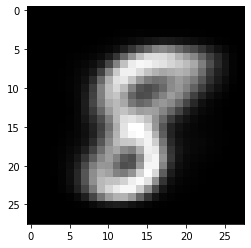

0 35.693665 30.58967 5.103997


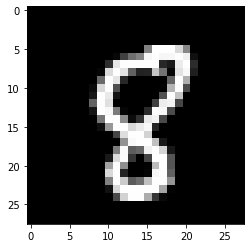

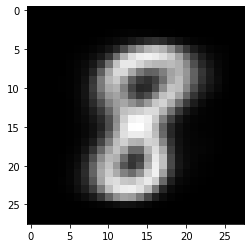

200 34.60263 29.381104 5.2215266


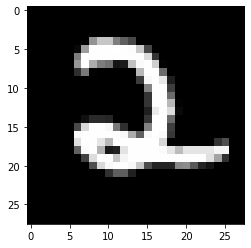

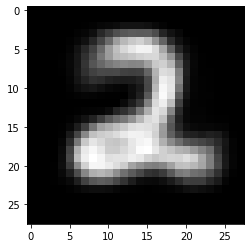

400 38.52865 33.31235 5.2162976


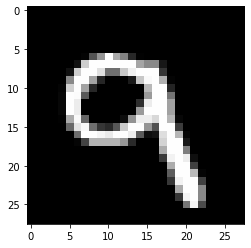

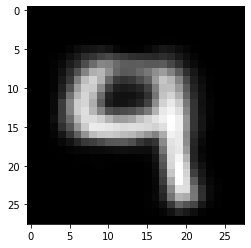

600 36.447906 31.10733 5.340578


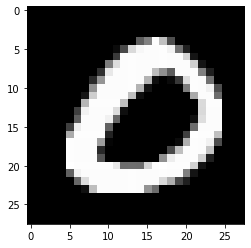

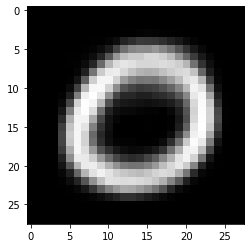

800 38.558174 33.415703 5.142471


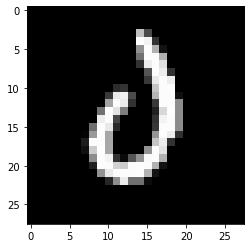

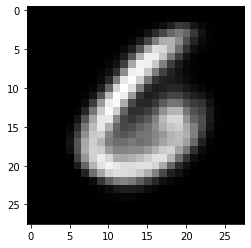

1000 39.67475 34.606907 5.0678444


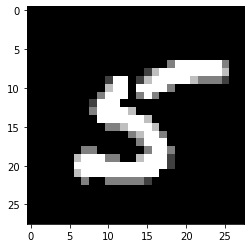

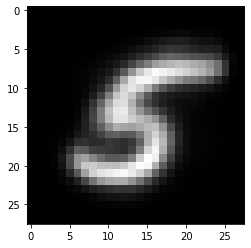

1200 35.34284 30.30968 5.033159


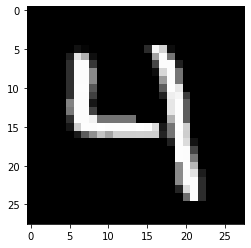

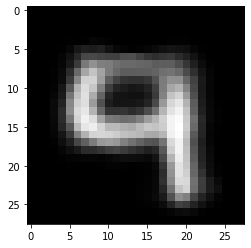

1400 37.93744 32.903553 5.033886


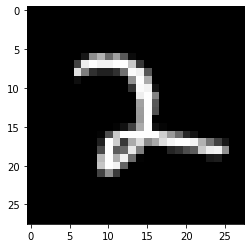

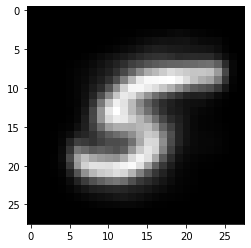

1600 39.09421 34.265907 4.828305


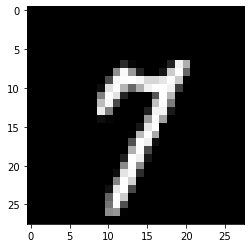

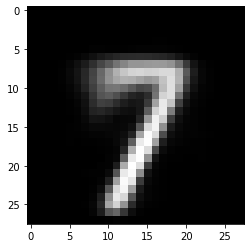

1800 36.56854 31.383715 5.184823


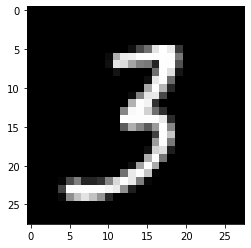

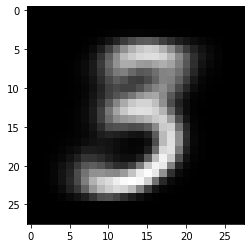

2000 37.766453 32.591644 5.1748075


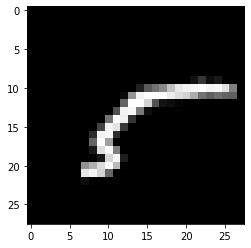

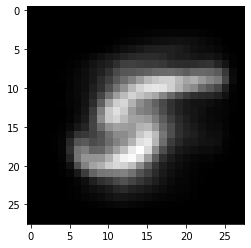

2200 38.369385 33.170586 5.198803


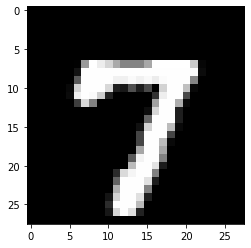

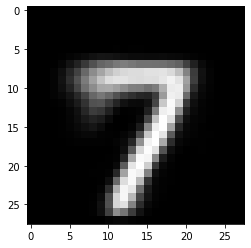

2400 34.790306 29.599594 5.1907086


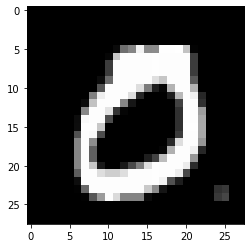

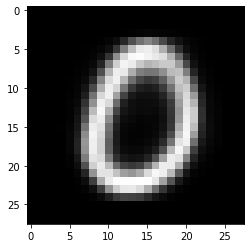

2600 35.48108 30.475172 5.005906


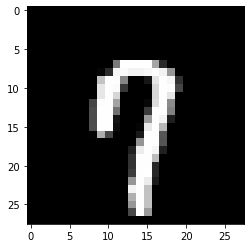

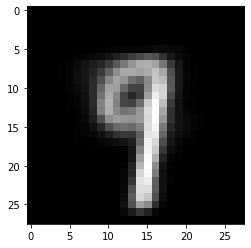

2800 33.874588 28.892809 4.981783


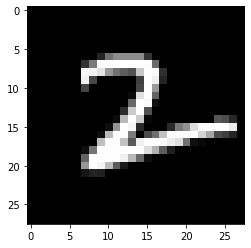

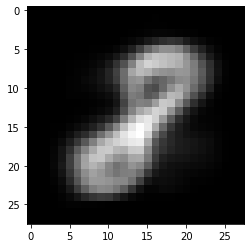

3000 33.014458 27.86727 5.147189


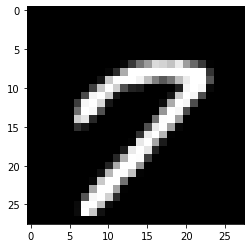

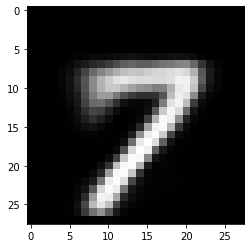

3200 35.84755 30.710197 5.137356


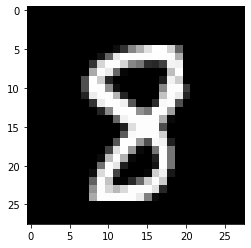

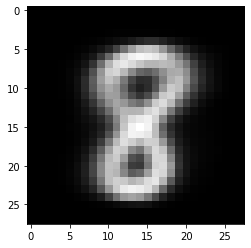

3400 35.033524 30.159014 4.874512


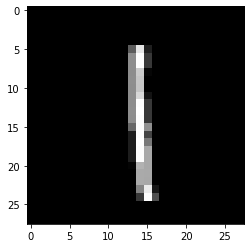

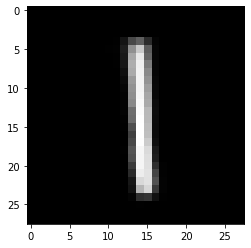

3600 32.394035 27.188793 5.2052426


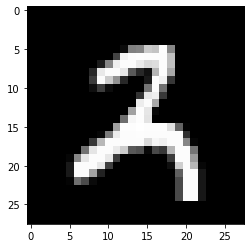

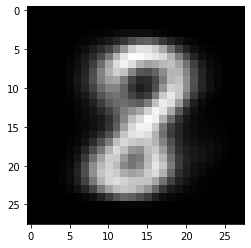

3800 35.58937 30.593685 4.995687


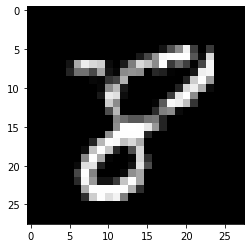

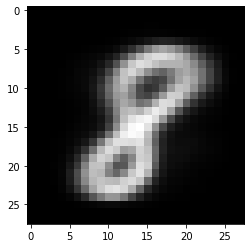

4000 37.004585 32.083206 4.921379


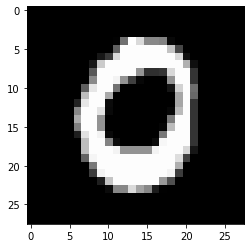

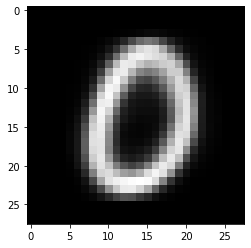

4200 35.63645 30.493546 5.142907


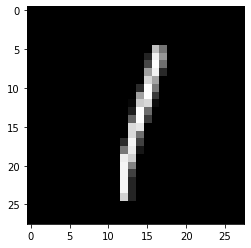

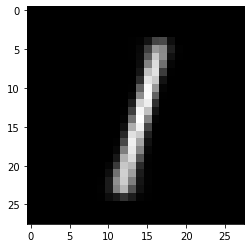

4400 36.584137 31.490261 5.0938797


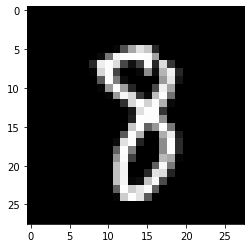

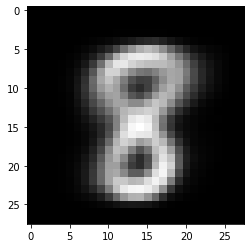

4600 34.831688 29.59327 5.238417


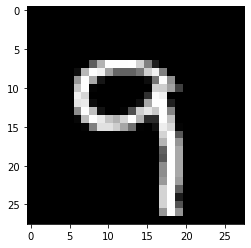

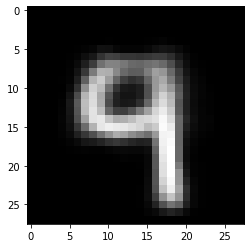

4800 32.23369 27.120161 5.1135273


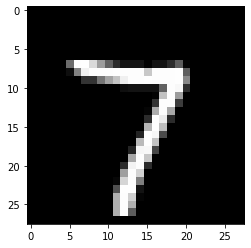

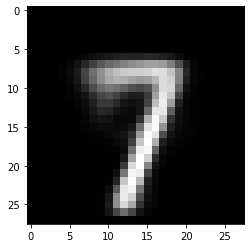

5000 34.621506 29.433834 5.1876707


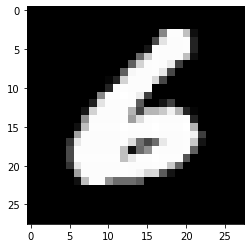

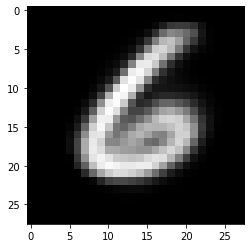

5200 36.790657 31.70706 5.0835958


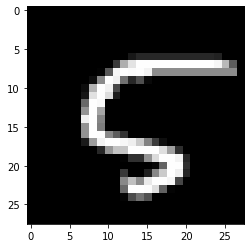

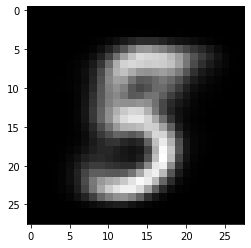

5400 33.02517 28.006866 5.018303


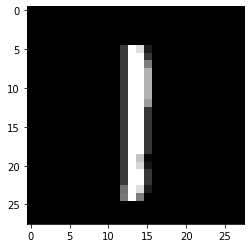

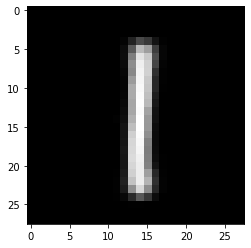

5600 33.639347 28.533297 5.1060505


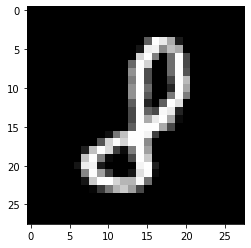

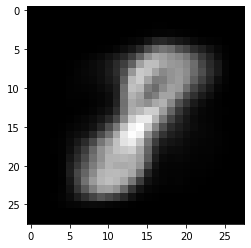

5800 35.709328 30.69217 5.017161


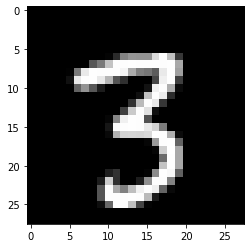

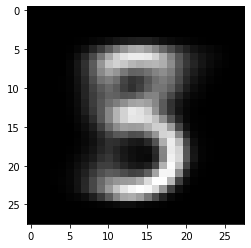

6000 39.13485 34.156914 4.9779367


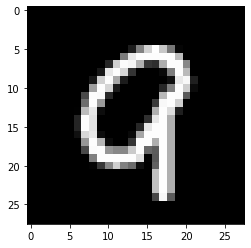

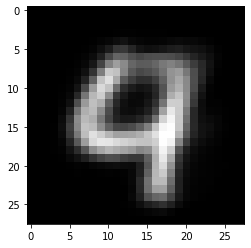

6200 36.24522 30.878704 5.366517


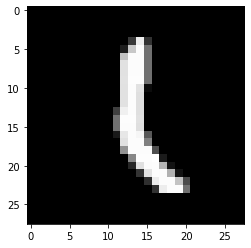

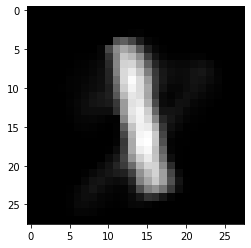

6400 37.265472 32.15144 5.114029


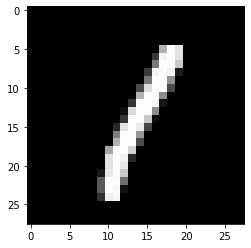

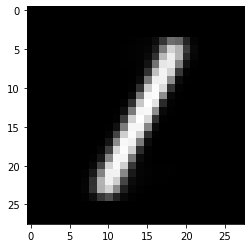

6600 33.06948 27.9818 5.0876794


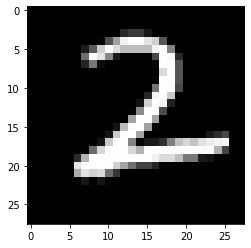

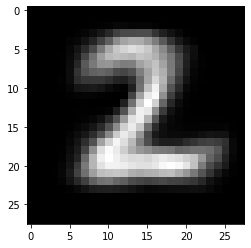

6800 33.766743 28.744263 5.022479


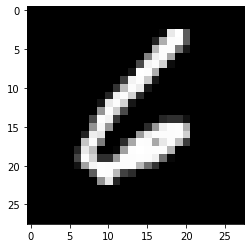

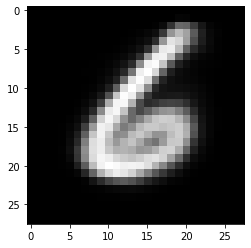

7000 36.616875 31.418978 5.1979


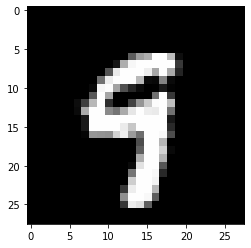

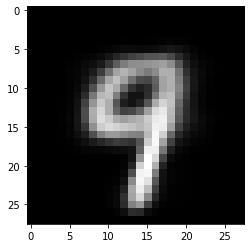

7200 34.003273 28.617247 5.3860283


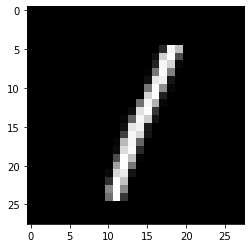

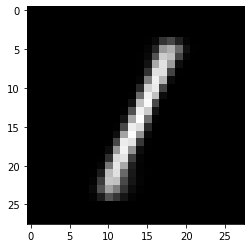

7400 33.29547 28.153032 5.1424365


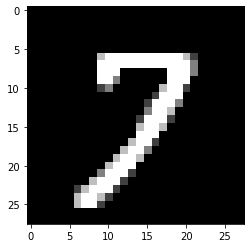

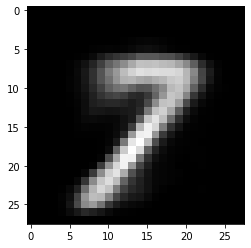

7600 37.55116 32.5268 5.0243587


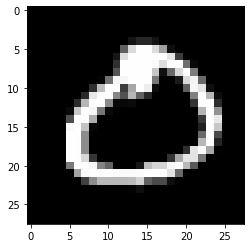

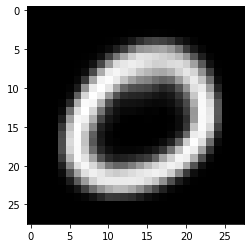

7800 37.194332 32.060646 5.133688


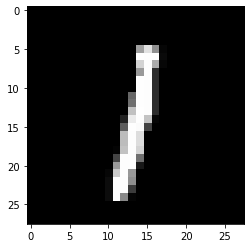

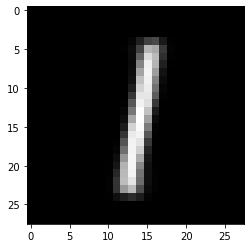

8000 34.05526 28.811007 5.244251


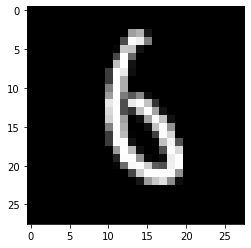

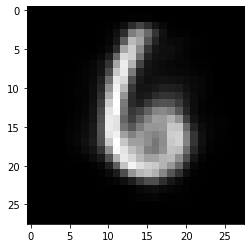

8200 35.940685 30.659351 5.281332


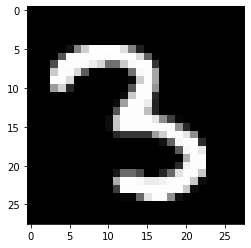

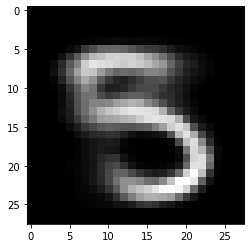

8400 35.12587 30.034298 5.09157


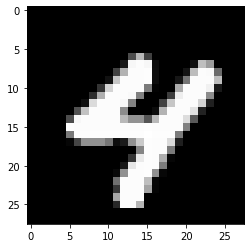

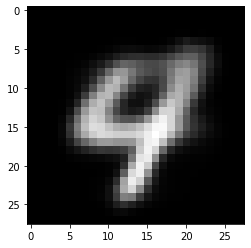

8600 32.44629 27.105934 5.340353


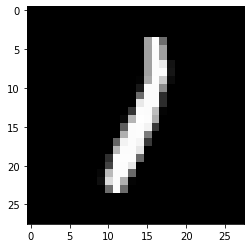

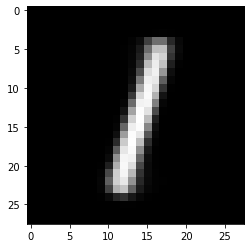

8800 32.71469 27.553303 5.1613884


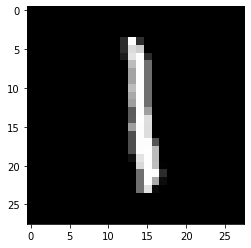

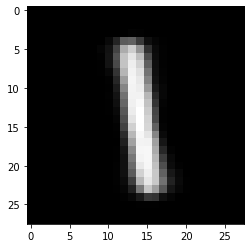

9000 34.63176 29.539776 5.091981


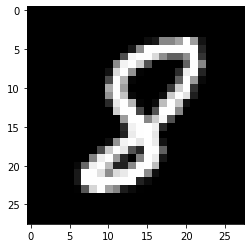

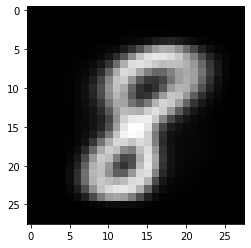

9200 37.27038 32.06647 5.20391


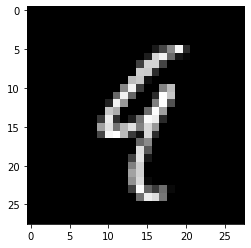

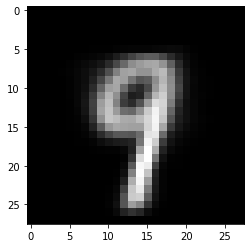

9400 34.072353 28.71915 5.353203


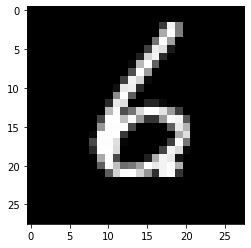

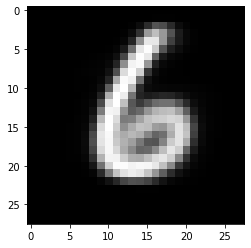

9600 36.478195 31.384392 5.0938067


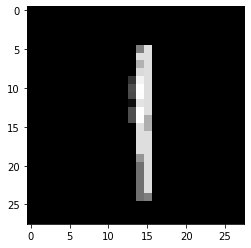

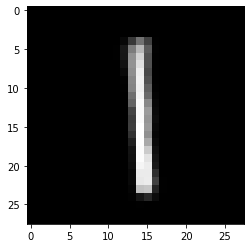

9800 32.54682 27.182808 5.3640165


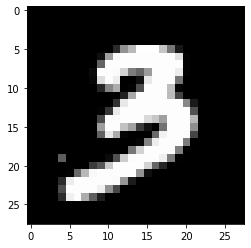

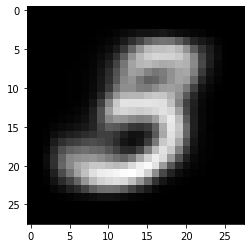

10000 34.609142 29.402365 5.2067795


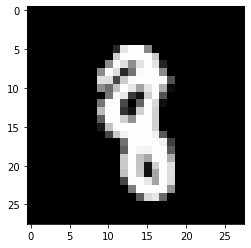

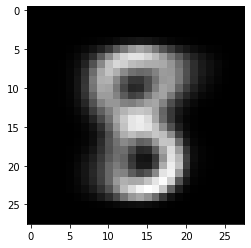

10200 37.06067 31.894226 5.1664443


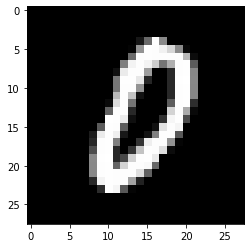

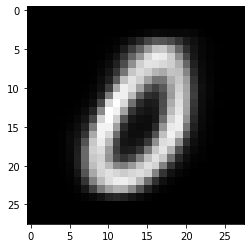

10400 34.213898 29.03445 5.1794477


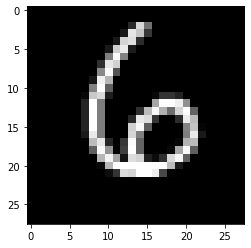

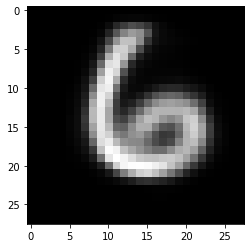

10600 32.600285 27.147982 5.452303


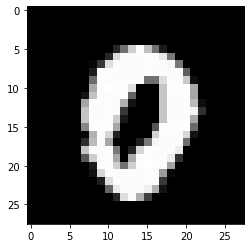

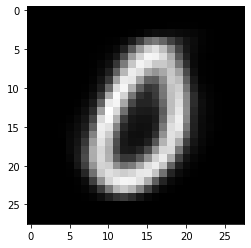

10800 36.09926 30.997856 5.1014023


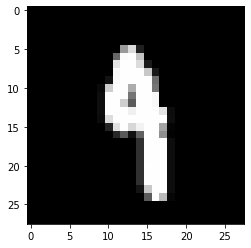

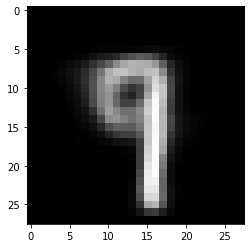

11000 35.83175 30.69382 5.1379266


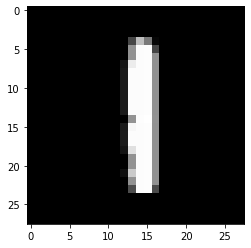

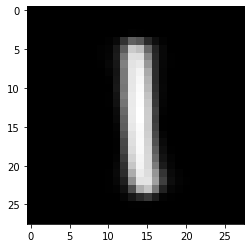

11200 35.87808 30.768265 5.109815


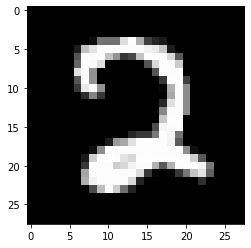

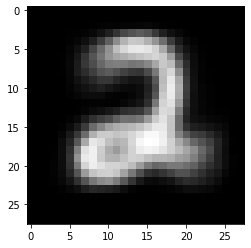

11400 34.847572 29.66926 5.178313


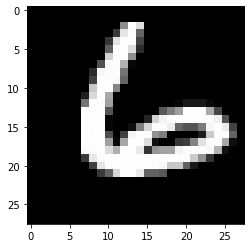

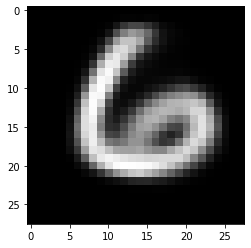

11600 33.962837 28.852154 5.1106825


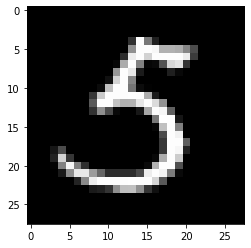

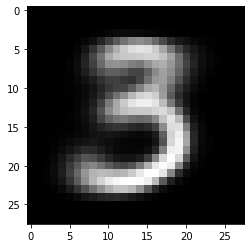

11800 36.056347 30.905645 5.150699


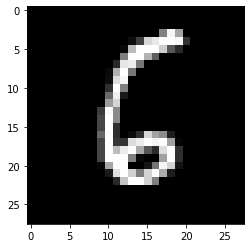

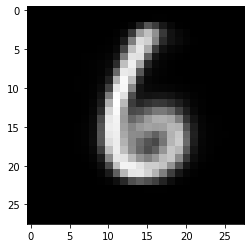

12000 33.75065 28.443245 5.3074045


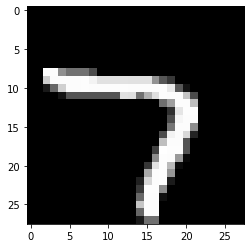

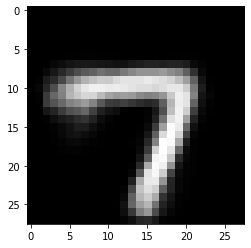

12200 32.425198 27.136082 5.289112


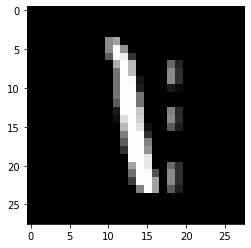

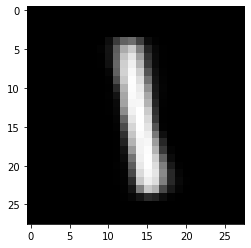

12400 34.58055 29.230904 5.3496494


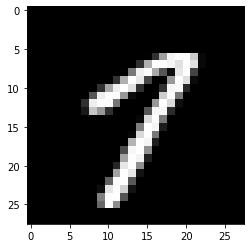

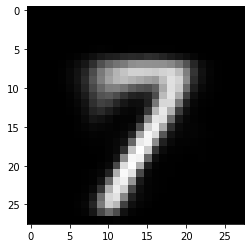

12600 34.36787 29.132607 5.235266


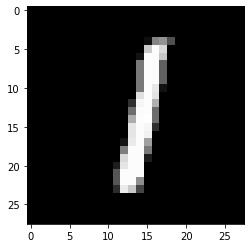

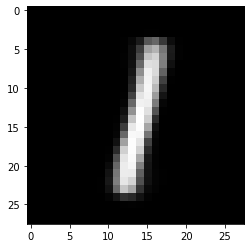

12800 34.747253 29.65658 5.0906773


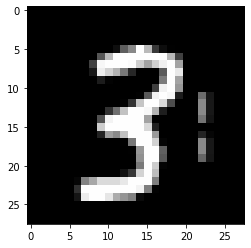

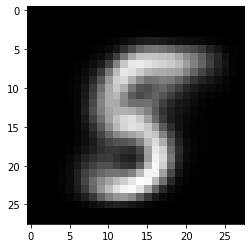

13000 33.545162 28.40572 5.1394424


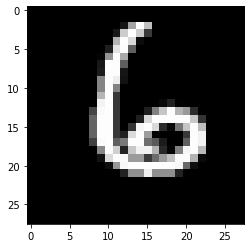

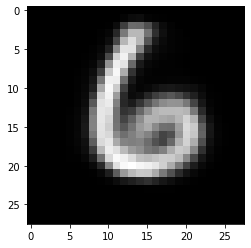

13200 36.22606 30.764347 5.4617167


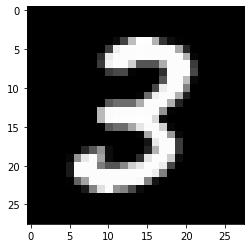

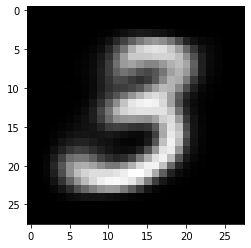

13400 33.984123 28.694052 5.2900715


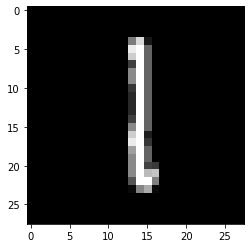

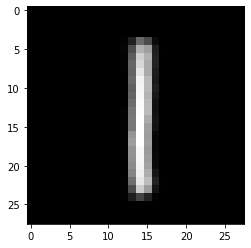

13600 36.865585 31.598404 5.2671824


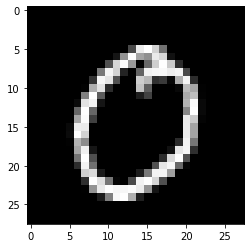

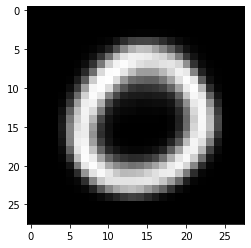

13800 35.585075 30.362421 5.222655


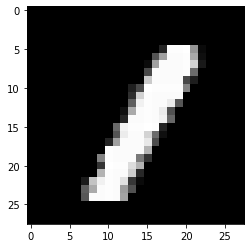

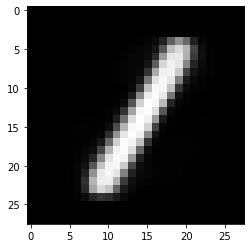

14000 34.11935 28.898287 5.2210627


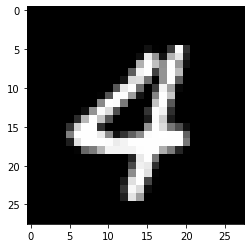

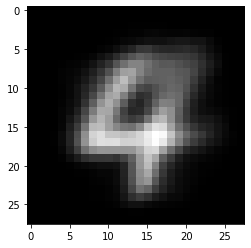

14200 35.40354 30.232275 5.1712656


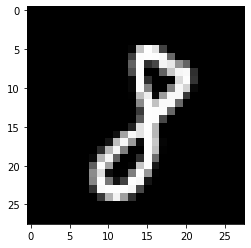

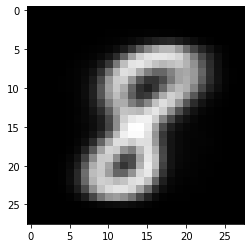

14400 39.24233 34.287277 4.9550533


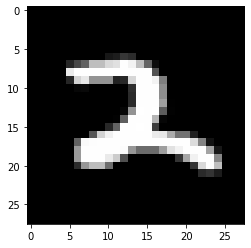

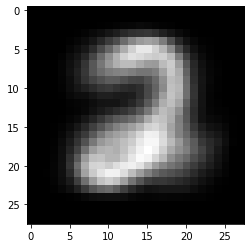

14600 36.319244 31.203495 5.115752


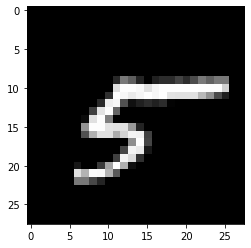

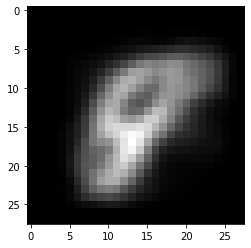

14800 36.91085 31.841244 5.0696073


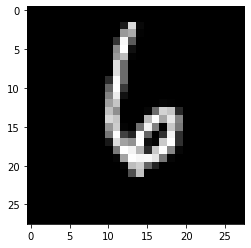

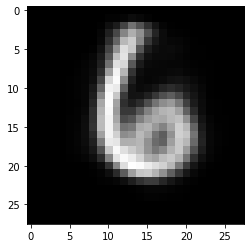

15000 32.85045 27.609375 5.2410717


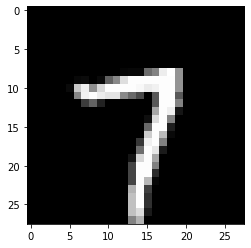

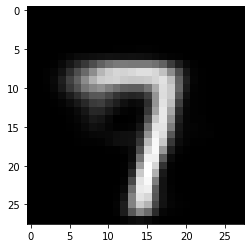

15200 33.26349 28.211973 5.051516


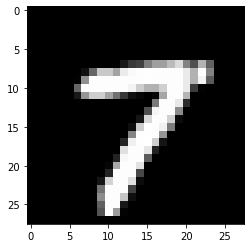

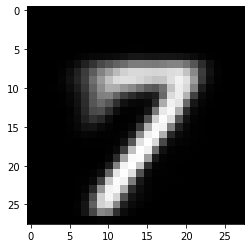

15400 37.06292 31.83712 5.2257977


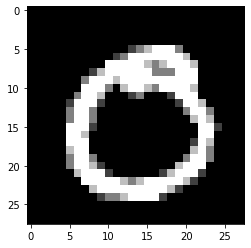

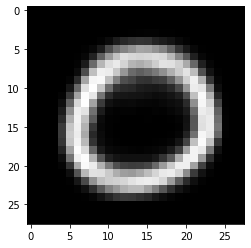

15600 35.860886 30.651218 5.209671


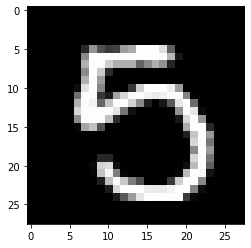

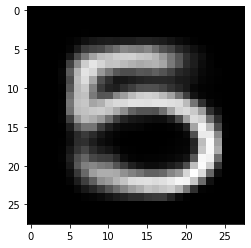

15800 37.56814 32.38806 5.1800776


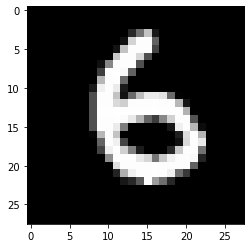

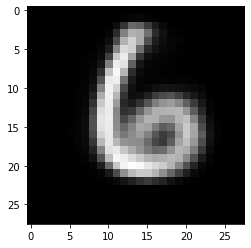

16000 35.38228 30.117775 5.264507


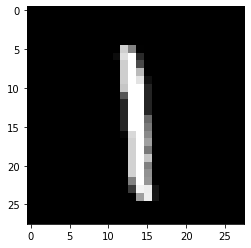

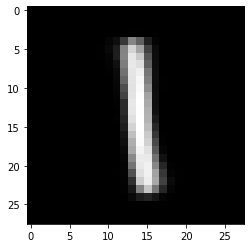

16200 33.47253 28.090822 5.3817067


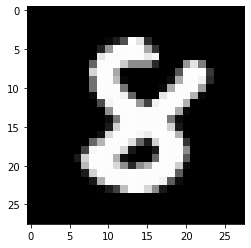

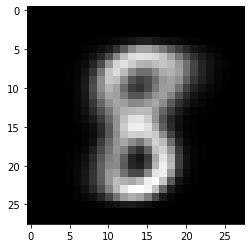

16400 36.4355 31.382406 5.0530953


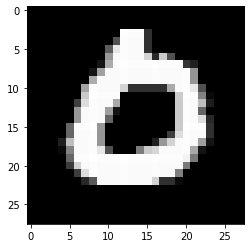

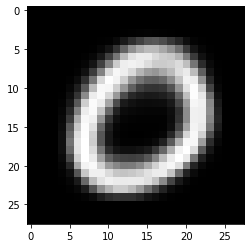

16600 34.30548 29.097 5.2084813


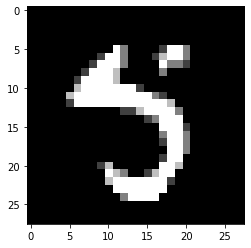

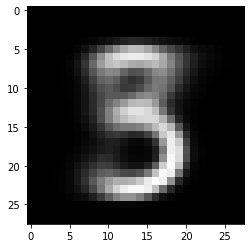

16800 33.77858 28.552277 5.226303


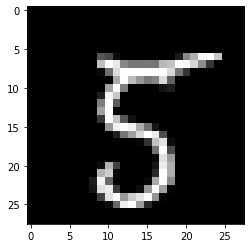

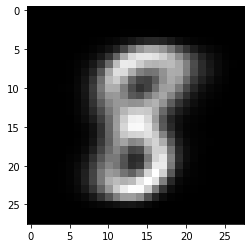

17000 34.401325 28.981829 5.419497


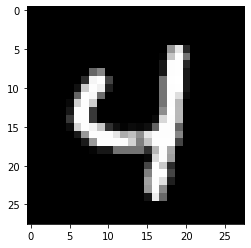

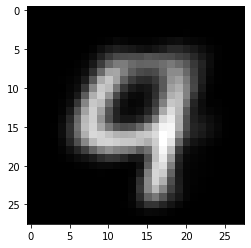

17200 36.53239 31.30925 5.223137


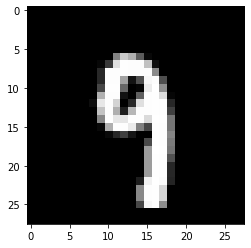

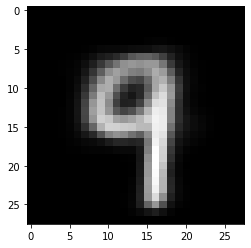

17400 32.688755 27.444483 5.2442703


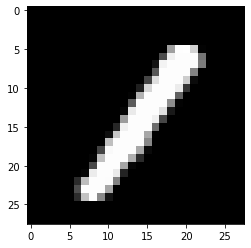

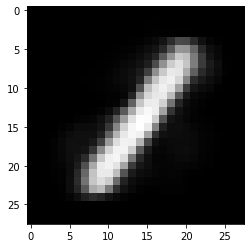

17600 37.470325 32.570847 4.8994765


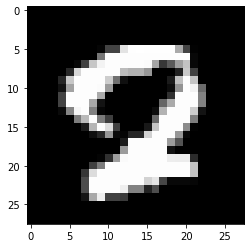

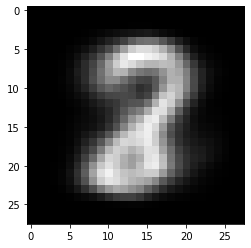

17800 36.010883 30.55008 5.460805


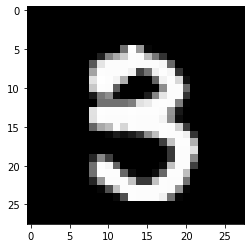

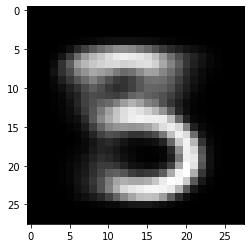

18000 33.97954 28.727654 5.2518888


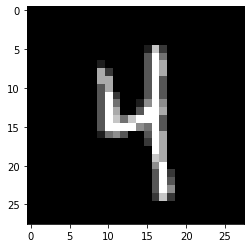

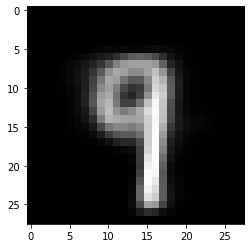

18200 39.385635 34.384125 5.0015154


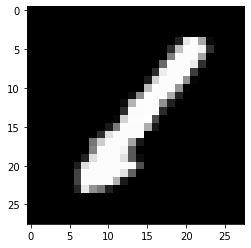

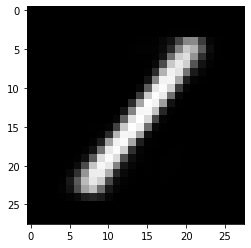

18400 35.128033 29.829716 5.298318


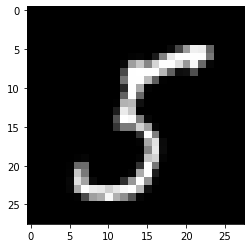

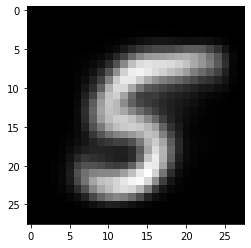

18600 35.740738 30.703938 5.0368004


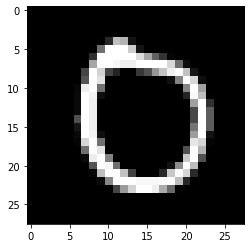

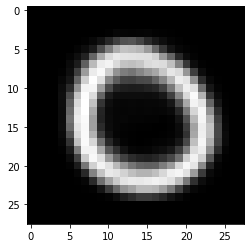

18800 34.876602 29.70165 5.1749544


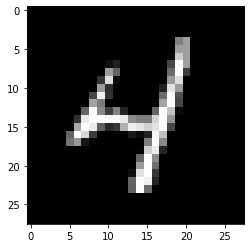

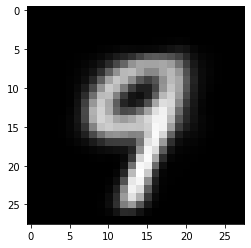

19000 34.816483 29.73143 5.0850506


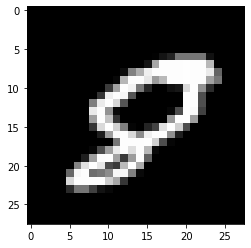

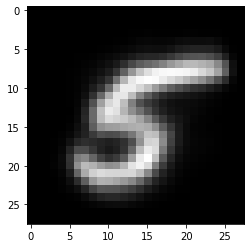

19200 34.799454 29.610497 5.188958


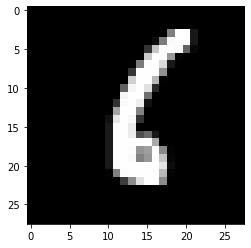

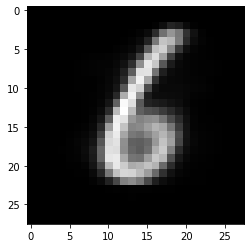

19400 36.777836 31.342905 5.4349313


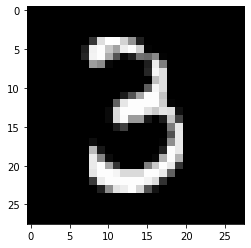

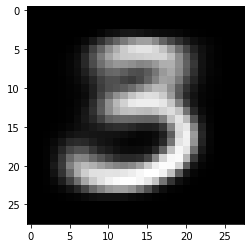

19600 31.556864 26.41146 5.1454043


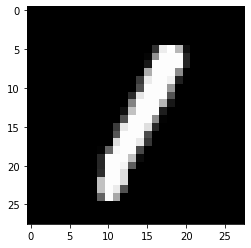

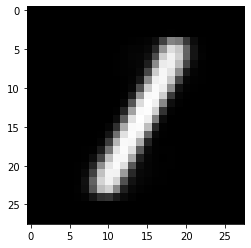

19800 35.827965 30.724064 5.1039004


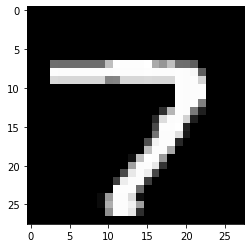

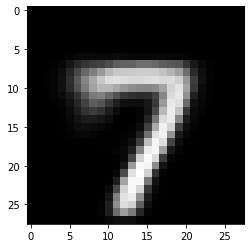

20000 39.219994 34.059288 5.160705


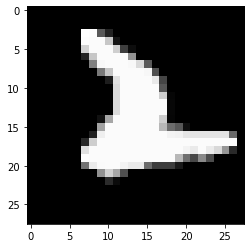

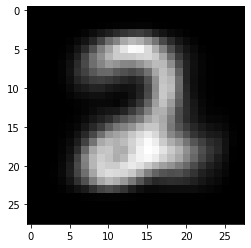

20200 37.82113 32.390213 5.4309144


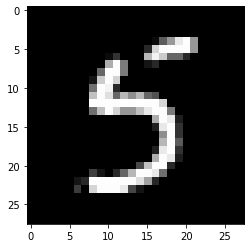

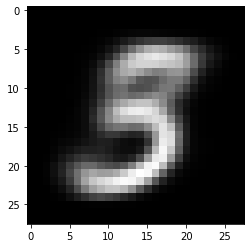

20400 36.57132 31.297993 5.273323


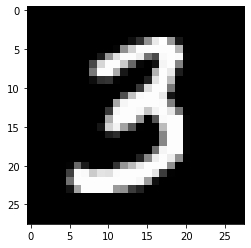

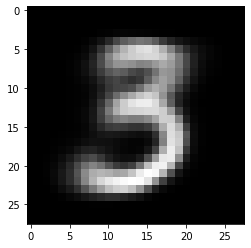

20600 38.251556 33.071327 5.1802273


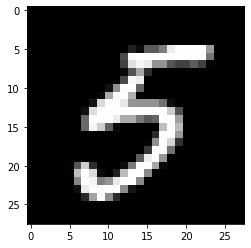

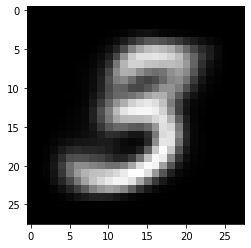

20800 34.91878 29.662666 5.2561145


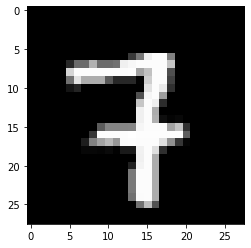

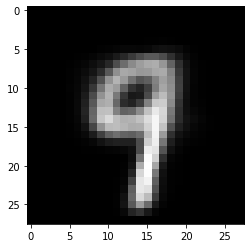

21000 37.23969 32.138416 5.1012726


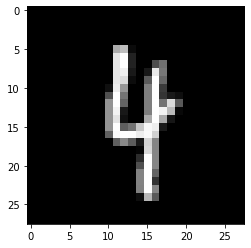

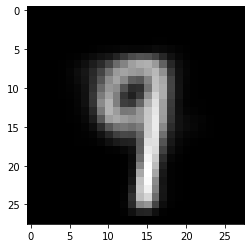

21200 35.732086 30.658413 5.0736694


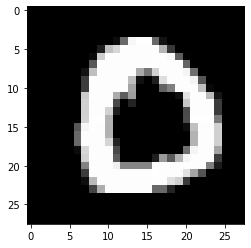

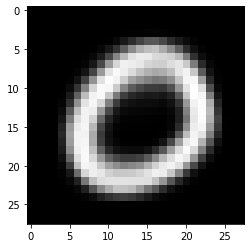

21400 33.57431 28.429018 5.1452947


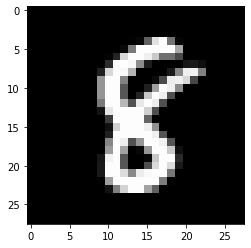

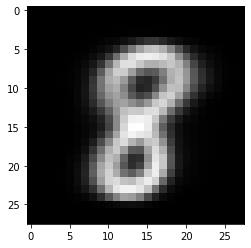

21600 38.158978 32.878227 5.2807527


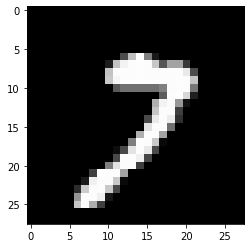

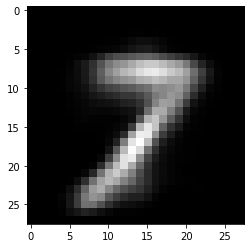

21800 35.37282 30.267756 5.1050653


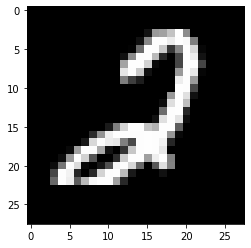

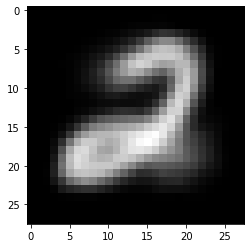

22000 35.67037 30.165028 5.5053415


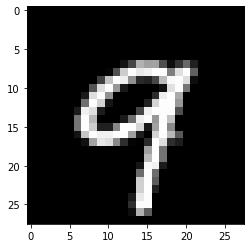

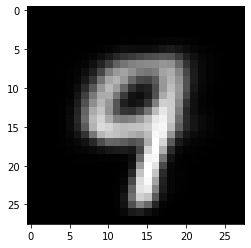

22200 34.207314 28.869537 5.3377743


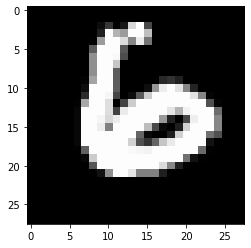

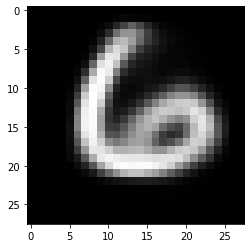

22400 33.678123 28.463097 5.215027


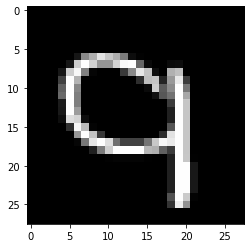

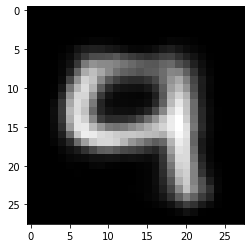

22600 35.760857 30.395155 5.365699


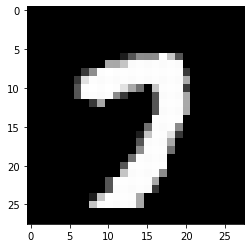

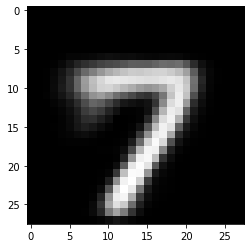

22800 34.696266 29.443417 5.252848


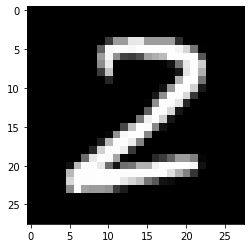

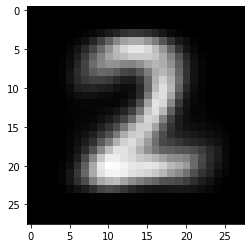

23000 38.474285 33.187588 5.286696


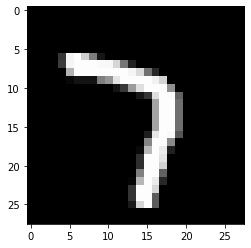

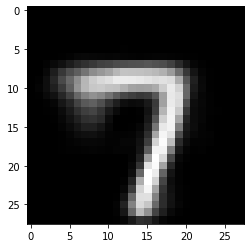

23200 36.236324 30.796957 5.4393687


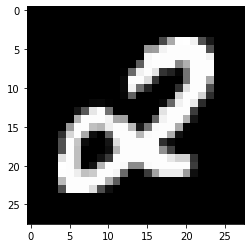

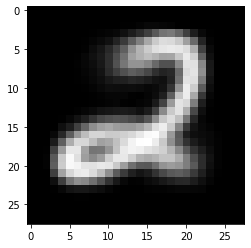

23400 35.207462 29.978085 5.2293777


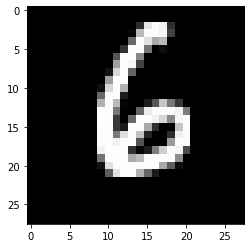

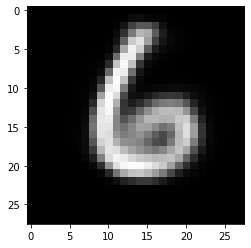

23600 33.680298 28.397514 5.282784


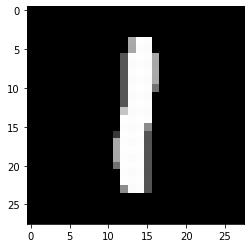

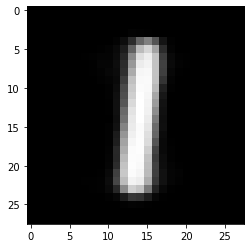

23800 38.873558 33.720825 5.1527357


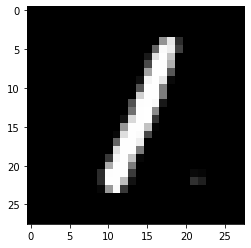

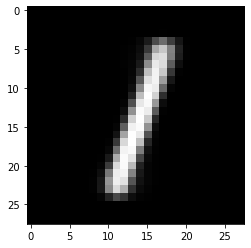

24000 35.73922 30.281994 5.457225


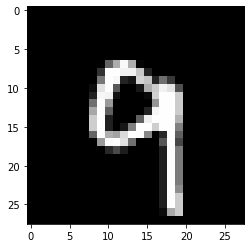

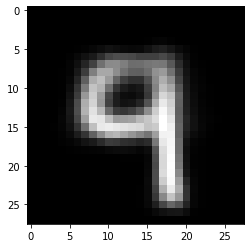

24200 35.127007 29.930853 5.1961536


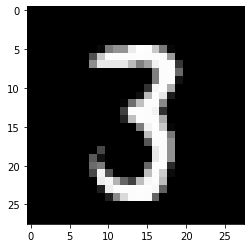

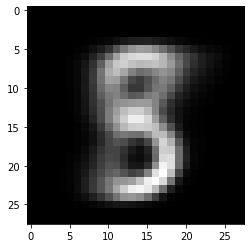

24400 31.954302 26.508938 5.4453645


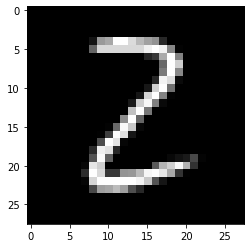

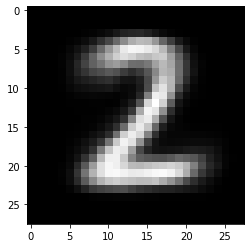

24600 35.20097 29.837872 5.3631


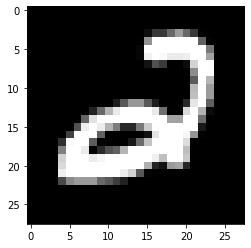

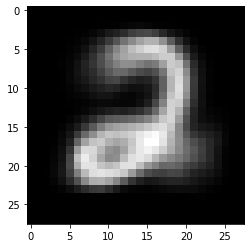

24800 33.803978 28.539417 5.264563


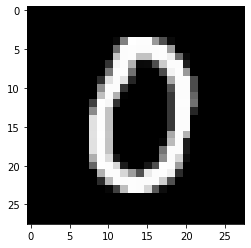

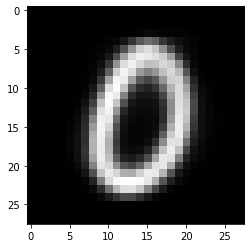

25000 33.877037 28.713615 5.163422


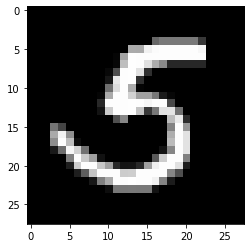

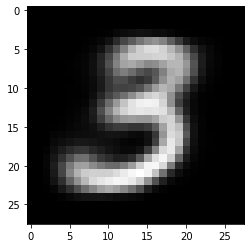

25200 37.476818 32.257507 5.2193136


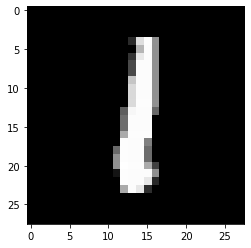

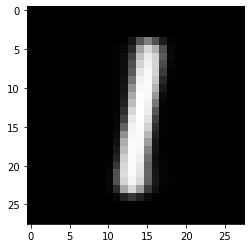

25400 30.852234 25.762487 5.0897474


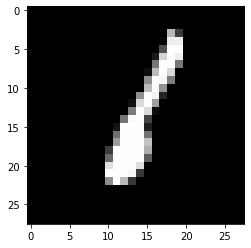

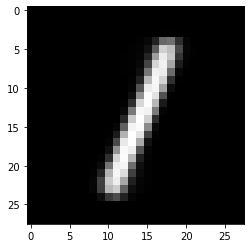

25600 37.7649 32.63221 5.1326904


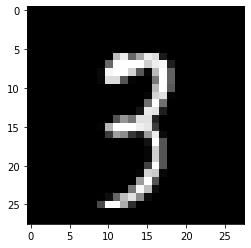

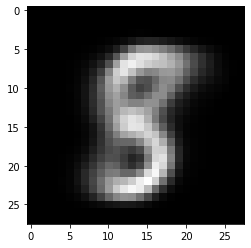

25800 36.757835 31.528187 5.229647


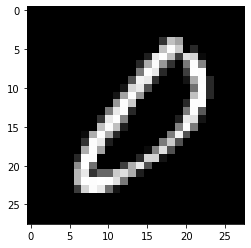

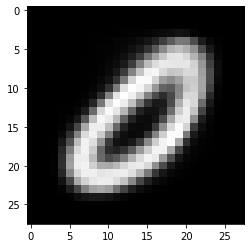

26000 33.28651 27.649895 5.6366186


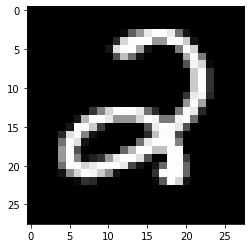

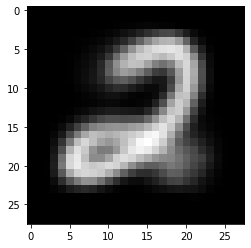

26200 36.947254 31.621876 5.3253784


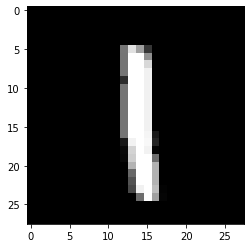

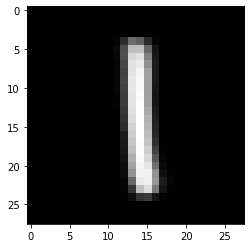

26400 35.47992 30.207977 5.2719445


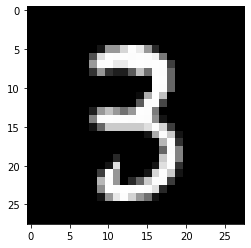

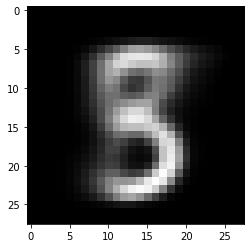

26600 33.969017 28.750988 5.218031


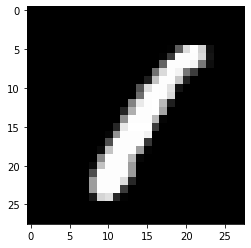

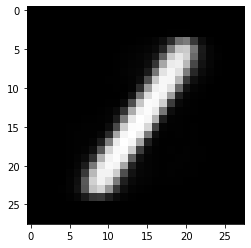

26800 32.216255 26.988947 5.2273073


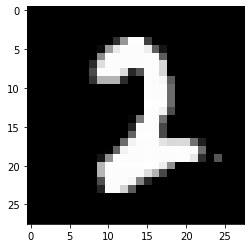

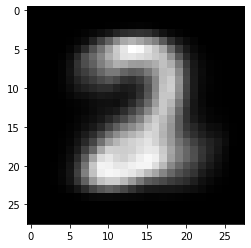

27000 35.9777 30.924152 5.053548


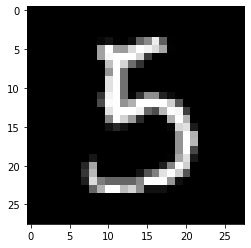

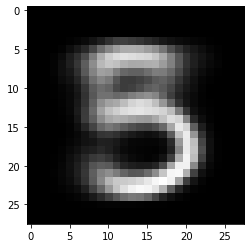

27200 33.19485 27.896692 5.2981577


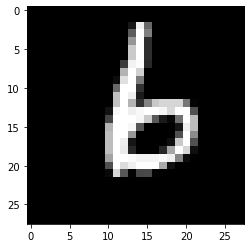

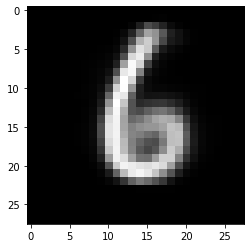

27400 34.02365 28.814396 5.2092533


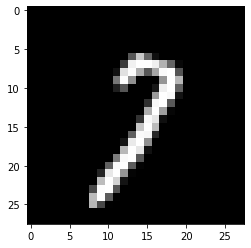

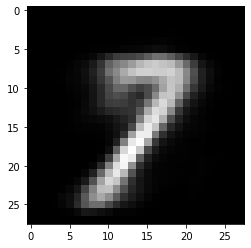

27600 33.05963 27.720985 5.3386416


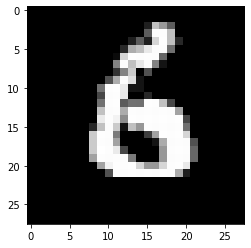

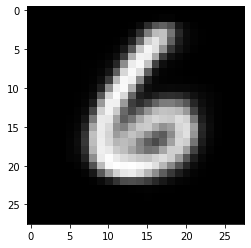

27800 32.472336 27.163256 5.3090773


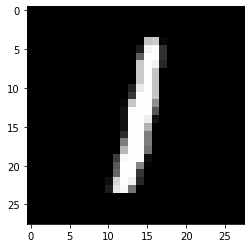

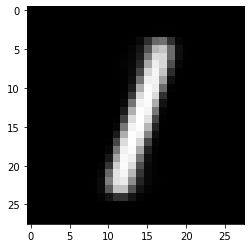

28000 33.58512 28.457676 5.1274476


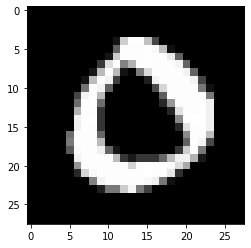

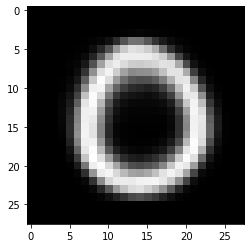

28200 37.219505 32.084503 5.1350017


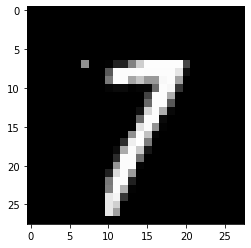

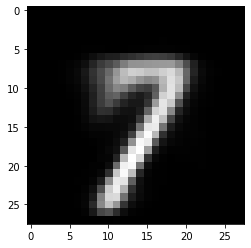

28400 35.530865 30.359234 5.1716337


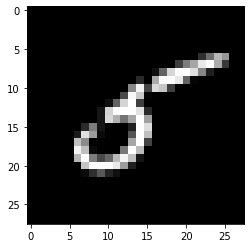

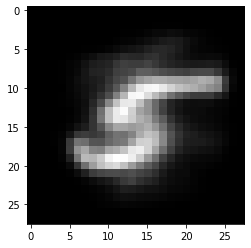

28600 35.108288 29.625347 5.4829407


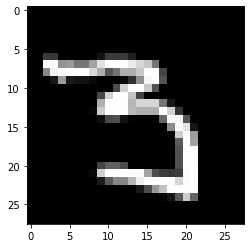

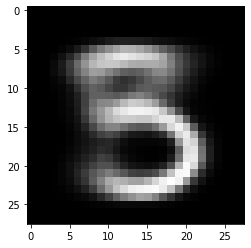

28800 35.196316 29.82999 5.3663273


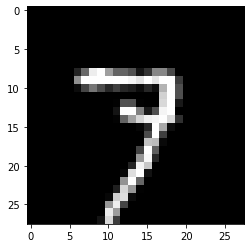

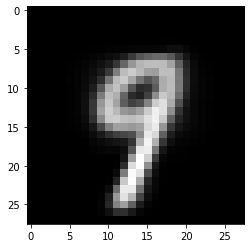

29000 37.146553 31.726757 5.419793


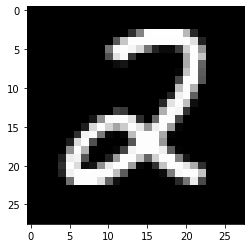

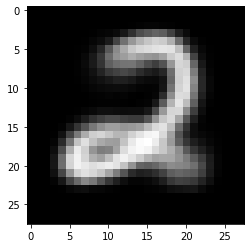

29200 33.392178 27.99181 5.400369


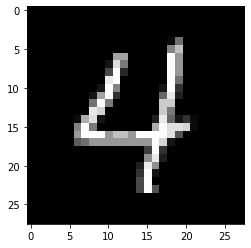

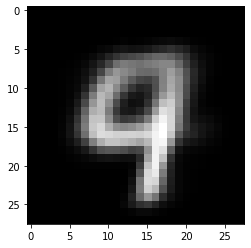

29400 36.336067 31.039919 5.2961473


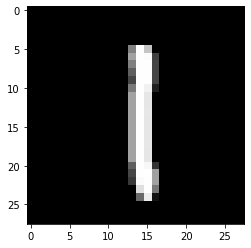

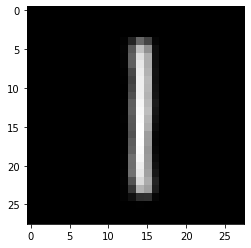

29600 36.522457 31.433641 5.088812


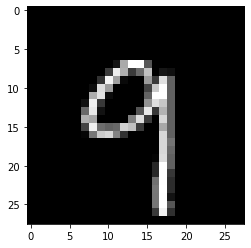

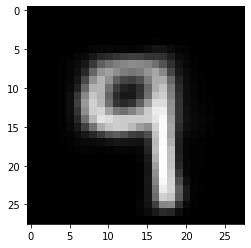

29800 33.826813 28.70736 5.1194534


In [0]:
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, img, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

In [0]:
for i in range(800):
    if mnist



In [0]:
mu, sigm = sess.run([mn, sd], feed_dict = {X_in:np.reshape(mnist.train.images[4], [1,28,28]), Y:np.reshape(mnist.train.images[4], [1,28,28])})

[]

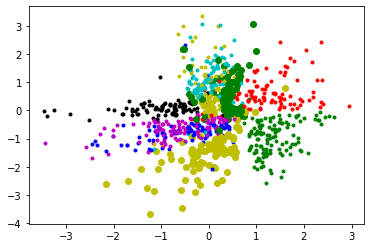

In [0]:
for i in range(1000):
    label = mnist.train.labels[i]
    mu, sigm = sess.run([mn, sd], feed_dict = {X_in:np.reshape(mnist.train.images[i], [1,28,28]), Y:np.reshape(mnist.train.images[i], [1,28,28])})
    if label == 9:
        plt.plot(mu[0][0], mu[0][1], 'b.')
    if label == 1:
        plt.plot(mu[0][0], mu[0][1], 'g.')
    if label == 2:
        plt.plot(mu[0][0], mu[0][1], 'r.')
    if label == 3:
        plt.plot(mu[0][0], mu[0][1], 'c.')
    if label == 4:
        plt.plot(mu[0][0], mu[0][1], 'm.')
    if label == 5:
        plt.plot(mu[0][0], mu[0][1], 'y.')
    if label == 6:
        plt.plot(mu[0][0], mu[0][1], 'k.')
    if label == 7:
        plt.plot(mu[0][0], mu[0][1], 'yo')
    if label == 8:
        plt.plot(mu[0][0], mu[0][1], 'go')

plt.plot()
